In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train.csv")
data

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,...,h_20,h_21,h_22,h_23,h_24,h_25,h_26,h_27,h_28,status
0,303.5900,303.4300,305.5100,306.2400,305.3700,305.0600,305.0100,305.4000,306.0000,306.0900,...,304.3900,305.2700,305.8800,304.9500,305.2900,304.0400,304.2700,304.3000,305.2500,0.0
1,368.1800,365.7500,361.9900,364.0600,363.1700,363.3000,364.4000,365.5200,363.6700,356.3300,...,359.1100,357.9800,357.4100,357.0700,354.6800,353.8000,349.6200,351.6000,354.4700,0.0
2,21.2989,21.3389,21.3376,21.2184,21.0715,21.0046,21.0328,21.0681,21.1238,21.0130,...,21.1085,21.1412,21.1270,21.0260,21.0800,21.0868,21.1969,21.0473,21.0621,0.0
3,16.7998,16.8058,16.7182,16.6321,16.6668,16.6284,16.6463,16.4354,16.4730,16.3476,...,16.5478,16.5099,16.4250,16.4874,16.4593,16.4595,16.4946,16.5199,16.5218,1.0
4,347.8000,344.3300,342.6800,351.6000,349.6200,359.4300,353.3100,348.1700,348.2800,350.1900,...,331.2700,337.9000,338.9900,336.2700,340.1500,343.5000,347.6200,344.6000,347.8300,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25169,400.4000,391.6000,396.2000,390.6000,390.0000,402.4000,403.3000,406.8000,402.5000,406.2000,...,414.9000,418.4000,413.3000,415.2000,417.8000,420.0000,418.9000,419.7000,416.1000,0.0
25170,266.4001,266.5216,264.2020,263.3890,260.2649,260.9700,258.7779,254.9954,255.2105,258.5394,...,259.5864,261.1792,256.1490,256.4059,254.8381,256.7242,255.1824,252.2200,254.6630,1.0
25171,16.5206,16.4068,16.4221,16.4275,16.3441,16.3951,16.4389,16.4525,16.5334,16.5490,...,17.0366,16.9165,16.8923,16.9117,16.9600,16.9845,17.0035,16.9944,16.8813,1.0
25172,491.2000,490.0000,490.4000,490.5000,489.4000,486.3000,488.6000,489.3000,490.3000,485.9000,...,489.4000,490.2000,489.2000,488.4000,488.9000,491.3000,492.1000,491.3000,490.1000,1.0


In [3]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

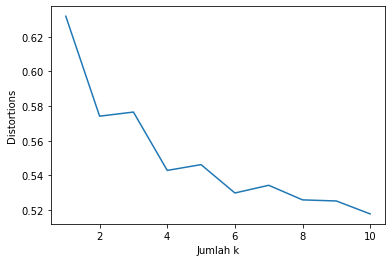

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

list_1 = []
K = range(1, 11)
for i in K:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  preds = knn.predict(X_test)
  scores = accuracy_score(y_test, preds)
  list_1.append(scores)

#Menggambar elbow
plt.plot(K, list_1, '-')
plt.xlabel('Jumlah k')
plt.ylabel('Distortions')
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1898 1142]
 [1175 2079]]


0.6318716237686686

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62      3040
         1.0       0.65      0.64      0.64      3254

    accuracy                           0.63      6294
   macro avg       0.63      0.63      0.63      6294
weighted avg       0.63      0.63      0.63      6294



In [11]:
datat = pd.read_csv("test_soal.csv")
datat

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,...,h_19,h_20,h_21,h_22,h_23,h_24,h_25,h_26,h_27,h_28
0,371.1000,373.4000,377.5000,378.7000,378.4000,376.9000,380.1000,382.4000,381.6000,380.2000,...,373.9000,371.8000,372.9000,373.0000,375.0000,376.7000,377.4000,374.9000,377.1000,378.1000
1,21.8002,22.0125,21.8196,21.5034,21.5724,21.9344,21.8135,21.9626,22.9809,22.8522,...,22.3193,22.5838,22.4538,22.2917,22.6930,22.2794,22.7801,22.6797,23.2745,23.6477
2,33.3447,33.1191,33.0849,33.0843,32.9912,32.5786,32.7185,32.4195,32.7812,31.9584,...,32.2980,32.5186,32.6183,33.2084,33.1996,33.5176,33.6696,33.4384,33.4957,33.5986
3,17.0649,17.0520,17.0851,17.1365,17.1532,17.1797,17.1868,17.2131,17.2927,17.2224,...,17.1553,17.1119,17.0754,17.0549,17.0362,17.0211,16.9615,16.9542,16.9350,16.9329
4,318.5130,320.6418,323.6143,327.8755,326.4917,327.4583,327.8121,325.8354,326.6951,321.9228,...,335.9800,337.4390,334.6706,339.9901,349.2000,349.5033,347.3175,341.5232,343.8698,343.1532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,18.3417,18.3714,18.4990,18.4100,18.3524,18.3186,18.2674,18.2857,18.1400,18.0797,...,18.0415,18.1204,18.1517,18.1161,18.1032,18.1100,18.1010,18.1033,18.1423,18.2134
6290,28.9408,28.9114,28.6951,29.0013,29.0958,28.9292,28.9350,29.0799,28.8991,28.9820,...,29.2480,29.1479,29.2712,29.2589,29.2176,29.1093,29.1066,28.9894,28.9547,28.9081
6291,22.8166,22.9965,22.8400,22.8540,22.7306,22.9500,23.2377,23.6682,23.3193,23.3157,...,22.3736,22.6351,22.8981,22.7292,22.9100,22.6120,22.6390,22.8200,22.8353,22.7557
6292,24.3247,24.4986,24.3624,24.1851,24.2632,24.4195,24.1717,24.2911,24.2554,24.4409,...,25.3228,25.4297,25.2077,24.9216,25.1189,25.1179,24.8408,24.6628,25.0427,25.0090


In [12]:
testing_pred = knn.predict(datat)
testing_pred

array([1., 1., 0., ..., 0., 0., 0.])

In [13]:
df_test_predict = pd.DataFrame({'status' : testing_pred})
df_test_predict

,status
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
6289,1.0
6290,0.0
6291,0.0
6292,0.0


Visualisasi Persebaran Data


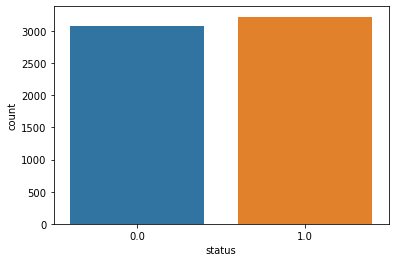

1.0    3223
0.0    3071
Name: status, dtype: int64


In [14]:
str_visualisasi = 'Visualisasi Persebaran Data'
print(str_visualisasi)
plt.figure(str_visualisasi)
sns.countplot(x='status', data=df_test_predict)
plt.show()
print(df_test_predict["status"].value_counts())

In [15]:
#df_test_predict.to_csv('iqbal.csv',index=False)